<a href="https://colab.research.google.com/github/SalwaMustafa/DEPI-Tasks/blob/main/NLP_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_url = "/content/drive/MyDrive/twitter_training.csv"
test_url = "/content/drive/MyDrive/twitter_test.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_set = pd.read_csv(train_url, header=None)
test_set = pd.read_csv(test_url, header=None)

In [4]:
train_set.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
train_set.columns = ["id", "topic", "target", "tweet"]
test_set.columns = ["id", "topic", "target", "tweet"]

In [6]:
train_set.shape

(74682, 4)

In [7]:
train_set['target'].value_counts()

,count
target,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [8]:
train_set.isnull().sum()

,0
id,0
topic,0
target,0
tweet,686


In [9]:
test_set.isnull().sum()

,0
id,0
topic,0
target,0
tweet,0


In [10]:
train_set.dropna(inplace=True)

In [11]:
train_set.duplicated().sum()

np.int64(2340)

In [12]:
test_set.duplicated().sum()

np.int64(0)

In [13]:
train_set['topic'].value_counts()

,count
topic,
LeagueOfLegends,2377
MaddenNFL,2377
CallOfDuty,2376
Verizon,2365
TomClancysRainbowSix,2364
Facebook,2362
Microsoft,2361
Dota2,2359
WorldOfCraft,2357


In [14]:
train_set.drop_duplicates(inplace=True)

In [15]:
train_set = train_set.drop(columns=['id','topic'])
test_set = test_set.drop(columns=['id','topic'])

In [16]:
train_set.head()

,target,tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


/tmp/ipython-input-1433237776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_set, x="target", palette="Set2")


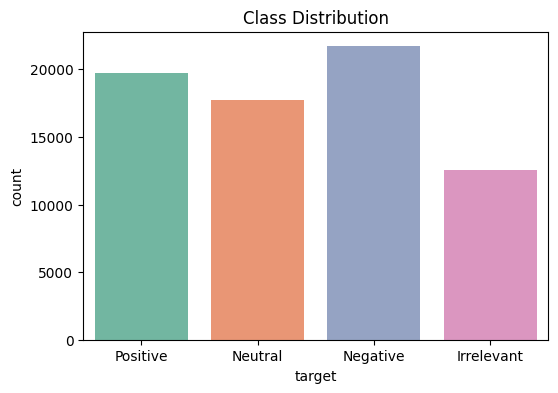

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_set, x="target", palette="Set2")
plt.title("Class Distribution")
plt.show()

/tmp/ipython-input-822454679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_set, x="target", palette="Set2")


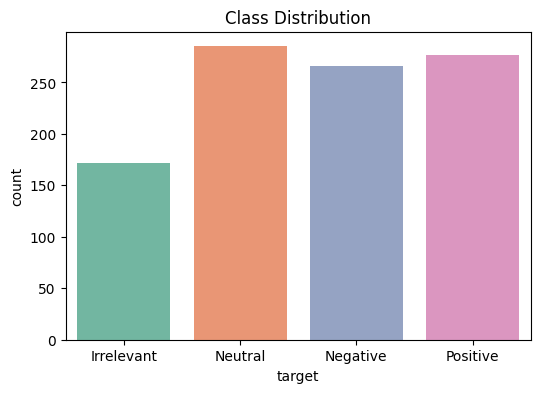

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=test_set, x="target", palette="Set2")
plt.title("Class Distribution")
plt.show()

In [19]:
train_set['tweet'].str.len().describe()

,tweet
count,71656.000000
mean,110.538127
std,79.409848
min,1.000000
25%,49.000000
50%,93.000000
75%,155.000000
max,957.000000


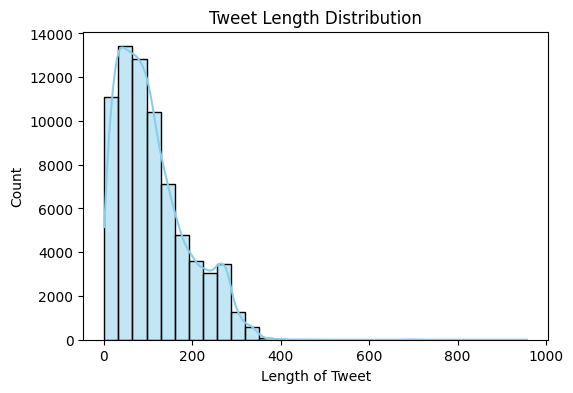

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(train_set["tweet"].str.len(), bins=30, kde=True, color="skyblue")
plt.title("Tweet Length Distribution")
plt.xlabel("Length of Tweet")
plt.ylabel("Count")
plt.show()

In [21]:
train_set["word_count"] = train_set["tweet"].apply(lambda x: len(str(x).split()))

In [22]:
short_tweets = train_set[train_set["word_count"] <= 1]

In [23]:
short_tweets.count()

,0
target,2155
tweet,2155
word_count,2155


In [24]:
short_tweets.sample(50)

,target,tweet,word_count
70368,Neutral,,0
68196,Positive,Cool.,1
54767,Irrelevant,out,1
31595,Negative,of,1
45935,Neutral,my,1
16229,Negative,and,1
15695,Positive,you,1
10217,Negative,the,1
69983,Neutral,the.be/fXUaF-Z1XCg,1
9353,Irrelevant,about,1


In [25]:
train_set = train_set[(train_set["word_count"] > 1)]

In [26]:
train_set[train_set["word_count"] <= 2].sample(50)

,target,tweet,word_count
16255,Positive,I'm excited!,2
18275,Negative,You know,2
26394,Positive,Handy work,2
16228,Negative,Very sad,2
52848,Positive,Oh sweet!,2
26633,Positive,Soooo Girl.,2
45845,Neutral,Shark to,2
60261,Neutral,Our <unk>,2
64345,Irrelevant,I cry!.,2
68175,Irrelevant,Quality 3.,2


In [27]:
train_set["word_count"].max()

198

In [31]:
train_set[train_set["word_count"] >= 150]

,target,tweet,word_count
1826,Neutral,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...,198
8546,Positive,I REALLY HAVE THE OVERWATCH RN GAME. SEA SEA S...,166
10454,Positive,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...,198
32186,Neutral,= = = = = = = = = = = = = = = = = = = = = = = ...,198
43712,Negative,# # # # # # # # # # # # # # # # # # # # # # # ...,198
52136,Neutral,There was a meeting with the interns on their ...,190
61388,Irrelevant,(PC) Come Vibe With Me. Messing Around in GTA!...,163
68078,Neutral,@ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...,175
68576,Negative,"When fear is raised that ""punk-2077"" may be po...",189
68624,Neutral,"I'm a little disappointed, but my schedule app...",194


/tmp/ipython-input-2840070302.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


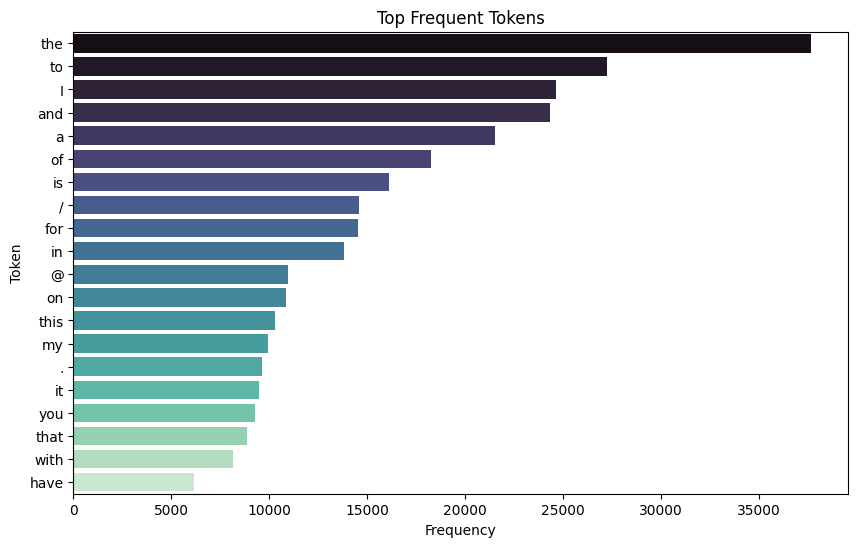

In [29]:
from collections import Counter

all_words = " ".join(train_set["tweet"]).split()
word_counts = Counter(all_words)

top_words = word_counts.most_common(20)

words, counts = zip(*top_words)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette="mako")
plt.title("Top Frequent Tokens")
plt.xlabel("Frequency")
plt.ylabel("Token")
plt.show()

In [30]:
import re

def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"\s*@\w+", " ", text)
    text = re.sub(r"\s*#\w+", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r'(_|\-|/|#|\*|\=|\.){2,}', ' ', text)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    text = " ".join(text.split())
    return text

print("Before Cleaning:")
print(train_set["tweet"].head(3))

print("-"*60)

print("After Cleaning:")
print(train_set["tweet"].head(3).apply(clean_tweet))

Before Cleaning:
0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
Name: tweet, dtype: object
------------------------------------------------------------
After Cleaning:
0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you all
Name: tweet, dtype: object


In [32]:
import spacy
nlp = spacy.load("en_core_web_sm")


def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_space]

In [33]:
train_set["clean_text"] = train_set["tweet"].apply(clean_tweet).str.lower()
train_set["tokens_after"] = train_set["clean_text"].apply(spacy_tokenizer)

test_set["clean_text"] = test_set["tweet"].apply(clean_tweet).str.lower()
test_set["tokens_after"] = test_set["clean_text"].apply(spacy_tokenizer)

In [34]:
vocab_after = set([tok for tokens in train_set["tokens_after"] for tok in tokens])

print("Vocabulary size after cleaning :", len(vocab_after))


print("Example tokens")
for i in range(3):
    print(f"Tweet {i+1}:")
    print("After :", train_set['tokens_after'].iloc[i])
    print("-"*50)

Vocabulary size after cleaning : 30243
Example tokens
Tweet 1:
After : ['i', 'm', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all']
--------------------------------------------------
Tweet 2:
After : ['i', 'am', 'coming', 'to', 'the', 'borders', 'and', 'i', 'will', 'kill', 'you', 'all']
--------------------------------------------------
Tweet 3:
After : ['i', 'm', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all']
--------------------------------------------------


In [35]:
import nltk
from nltk.corpus import stopwords, words


nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('words')
stop_words = set(stopwords.words('english'))


negations_en = {
    "no", "not", "nor", "never", "neither", "none", "nobody", "nothing", "nowhere",
    "cannot", "can't", "dont", "don't", "doesnt", "doesn't", "didnt", "didn't",
    "isnt", "isn't", "wasnt", "wasn't", "werent", "weren't",
    "havent", "haven't", "hasnt", "hasn't", "hadnt", "hadn't",
    "won't", "wouldnt", "wouldn't", "shouldnt", "shouldn't", "mustnt", "mustn't",
    "aint","ain't", "aren't","couldn't",'didn','aren','hadn', 'hasn','haven', 'isn',
    'mightn', "mightn't",'mustn', 'needn',"needn't", 'can','didn', 'doesn','wouldn',
    'shouldn','isn', 'weren', 'wasn'
}



stop_words = stop_words - negations_en

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [36]:
import string


def preprocess_tokens(tokens):
    clean_tokens = []
    for tok in tokens:

        if tok in stop_words:
            continue

        if tok.isdigit():
            clean_tokens.append("<unk>")
            continue

        if tok in string.punctuation:
            continue
        clean_tokens.append(tok)
    clean_tokens = [t for t in clean_tokens if t != "<unk>"]
    return clean_tokens


train_set["final_tokens"] = train_set["tokens_after"].apply(preprocess_tokens)
test_set["final_tokens"] = test_set["tokens_after"].apply(preprocess_tokens)

print("Example:")
print("Before:", train_set["tokens_after"].iloc[0])
print("After :", train_set["final_tokens"].iloc[0])

Example:
Before: ['i', 'm', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all']
After : ['getting', 'borderlands', 'murder']


In [37]:
from nltk.stem import PorterStemmer
nlp = spacy.load("en_core_web_sm")

stemmer = PorterStemmer()

train_set['stemmed_tokens'] = train_set['final_tokens'].apply(lambda tokens: [stemmer.stem(tok) for tok in tokens])
test_set['stemmed_tokens'] = test_set['final_tokens'].apply(lambda tokens: [stemmer.stem(tok) for tok in tokens])

In [38]:
print("After stemming :", train_set["stemmed_tokens"].iloc[0])

After stemming : ['get', 'borderland', 'murder']


In [39]:
train_set = train_set[train_set["stemmed_tokens"].apply(len) > 0]
train_set["stemmed_text"] = train_set["stemmed_tokens"].apply(lambda tokens: " ".join(tokens))

test_set = test_set[test_set["stemmed_tokens"].apply(len) > 0]
test_set["stemmed_text"] = test_set["stemmed_tokens"].apply(lambda tokens: " ".join(tokens))

In [40]:
train_set["stemmed_text"].head(5)

,stemmed_text
0,get borderland murder
1,come border kill
2,get borderland kill
3,come borderland murder
4,get borderland murder


In [41]:
train_set["target"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [42]:
train_set["target"] = train_set["target"].map({"positive":2 , "Neutral":1 , "Negative": 0 , "Irrelevant": -1 })
test_set["target"] = test_set["target"].map({"positive":2 , "Neutral":1 , "Negative": 0 , "Irrelevant": -1 })

In [45]:
train_set = train_set.dropna(subset=["target"])
test_set = test_set.dropna(subset=["target"])

In [47]:
train_set = train_set.dropna(subset=["stemmed_text"])
train_set = train_set[train_set["stemmed_text"].str.strip() != ""]

In [48]:
test_set = test_set.dropna(subset=["stemmed_text"])
test_set = test_set[test_set["stemmed_text"].str.strip() != ""]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train_set["stemmed_text"],
    train_set["target"],
    test_size=0.2,
    random_state=42,
    stratify=train_set["target"]
)


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,3),
    sublinear_tf=True,
    min_df=3,
    max_df=0.9,
    stop_words='english'
)


X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(test_set["stemmed_text"])


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000, class_weight='balanced', C=2)
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.8126054590570719
              precision    recall  f1-score   support

        -1.0       0.74      0.82      0.78      2437
         0.0       0.86      0.82      0.84      4214
         1.0       0.82      0.80      0.81      3424

    accuracy                           0.81     10075
   macro avg       0.80      0.81      0.81     10075
weighted avg       0.82      0.81      0.81     10075



In [56]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(C=1.5, class_weight='balanced')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_val_tfidf)

print("Validation Accuracy:", accuracy_score(y_val, y_pred_svm))
print(classification_report(y_val, y_pred_svm))


Validation Accuracy: 0.8397022332506203
              precision    recall  f1-score   support

        -1.0       0.79      0.82      0.81      2437
         0.0       0.87      0.86      0.87      4214
         1.0       0.84      0.83      0.83      3424

    accuracy                           0.84     10075
   macro avg       0.83      0.84      0.83     10075
weighted avg       0.84      0.84      0.84     10075



In [58]:
train_set["target"] = train_set["target"] + 1
test_set["target"] = test_set["target"] + 1

In [60]:
y_train = y_train + 1
y_val = y_val + 1

In [61]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb_model.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))


Validation Accuracy: 0.7267493796526054
              precision    recall  f1-score   support

         0.0       0.77      0.52      0.62      2437
         1.0       0.69      0.89      0.78      4214
         2.0       0.77      0.67      0.72      3424

    accuracy                           0.73     10075
   macro avg       0.74      0.69      0.71     10075
weighted avg       0.74      0.73      0.72     10075



In [62]:
train_set["target"] = train_set["target"] - 1
test_set["target"] = test_set["target"] - 1

In [63]:
y_train = y_train - 1
y_val = y_val - 1

In [64]:
y_test_pred = svm_model.predict(X_test_tfidf)

print("Test Accuracy:", accuracy_score(test_set["target"], y_test_pred))
print(classification_report(test_set["target"], y_test_pred))


Test Accuracy: 0.9336099585062241
              precision    recall  f1-score   support

        -1.0       0.90      0.95      0.92       172
         0.0       0.92      0.94      0.93       266
         1.0       0.97      0.91      0.94       285

    accuracy                           0.93       723
   macro avg       0.93      0.94      0.93       723
weighted avg       0.94      0.93      0.93       723

